In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, accuracy_score
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

LEVEL = 51
SEED = 1584353120

In [2]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
total_students = df.shape[0]

# Min number of points to pass, can be changed

students_passing_all_subjects = df[(df['math score'] > LEVEL) &
                                (df['writing score'] > LEVEL) & 
                                (df['reading score'] > LEVEL)].shape[0]

def result_of_exam( math, writing, reading):
  if(math > LEVEL and writing > LEVEL and reading > LEVEL):
    return 'P'
  else:
    return 'F'

df["Pass/Fail"] = df.apply(lambda x: result_of_exam(x['math score'],
                                                    x['writing score'],
                                                    x['reading score']), axis=1)  

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Pass/Fail
0,female,group B,bachelor's degree,standard,none,72,72,74,P
1,female,group C,some college,standard,completed,69,90,88,P
2,female,group B,master's degree,standard,none,90,95,93,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F
4,male,group C,some college,standard,none,76,78,75,P


In [6]:
df.shape

(1000, 9)

In [7]:
y=df['Pass/Fail']
lb=LabelEncoder()
y = lb.fit_transform(y)
X=df[['gender','race/ethnicity','parental level of education','lunch','test preparation course', 'Pass/Fail']]

In [8]:
# Divide data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=SEED)

def encode_features(df_train, df_test):
  features = ['gender', 'race/ethnicity', 'parental level of education',
              'lunch', 'test preparation course', 'Pass/Fail']
  df_combined = pd.concat([df_train[features], df_test[features]])

  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df_combined[feature])
    df_train[feature] = le.transform(df_train[feature])
    df_test[feature] = le.transform(df_test[feature])
  return df_train, df_test

X_train, X_test = encode_features(X_train, X_test)
#feature importances for better visualization
X_fin = pd.concat([X_train, X_test])

y=X_fin.iloc[:,-1] 
X_fin = X_fin.drop('Pass/Fail', axis=1)
X_train=X_train.drop('Pass/Fail', axis=1)
X_test=X_test.drop('Pass/Fail', axis=1)
X_fin.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
598,0,3,2,1,1
689,1,4,4,0,1
123,1,3,2,0,1
756,1,3,4,1,1
694,0,2,5,1,1


In [9]:
# Simple function for visualization
def plot_model(history):
    # summarize history for accuracy
    #plt.subplots(1, 2, figsize=(5, 5))
    fig = plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.tight_layout()
    plt.show()
    
def print_scores(y_test, predictions):
    cm = confusion_matrix(y_test, predictions)
    acc = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f_score = f1_score(y_test, predictions)

    print('Accuracy: {}\nPrecision: {}\nRecall: {}\nF1_score: {}'.format(
            acc, precision, recall, f_score))
    figure(figsize=(6, 2))
    sns.heatmap(cm, annot=True, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[How to split datasets?](https://www.youtube.com/watch?v=M3qpIzy4MQk)

In [16]:
# Shallow model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, shuffle=True, validation_split=0.3)
predictions = model.predict(X_test) > 0.5

Epoch 1/100
8/8 [==============================] - 1s 16ms/step - loss: 0.2090 - accuracy: 0.7198 - val_loss: 0.1808 - val_accuracy: 0.8009
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1862 - accuracy: 0.7669 - val_loss: 0.1707 - val_accuracy: 0.8057
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1780 - accuracy: 0.7669 - val_loss: 0.1692 - val_accuracy: 0.8057
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1752 - accuracy: 0.7669 - val_loss: 0.1639 - val_accuracy: 0.8057
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1712 - accuracy: 0.7669 - val_loss: 0.1595 - val_accuracy: 0.8057
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1673 - accuracy: 0.7669 - val_loss: 0.1582 - val_accuracy: 0.8057
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1661 - accuracy: 0.7689 - val_loss: 0.1571 - val_accuracy: 0.8057
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 4ms/step - loss: 0.1506 - accuracy: 0.7853 - val_loss: 0.1487 - val_accuracy: 0.7915
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1487 - accuracy: 0.7832 - val_loss: 0.1490 - val_accuracy: 0.7915
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1483 - accuracy: 0.7832 - val_loss: 0.1476 - val_accuracy: 0.8057
Epoch 62/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1487 - accuracy: 0.7873 - val_loss: 0.1475 - val_accuracy: 0.8104
Epoch 63/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1488 - accuracy: 0.7812 - val_loss: 0.1498 - val_accuracy: 0.7915
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1490 - accuracy: 0.7832 - val_loss: 0.1491 - val_accuracy: 0.7915
Epoch 65/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1494 - accuracy: 0.7751 - val_loss: 0.1522 - val_accuracy: 0.7678
Epoch 66/100
8/8 [===============

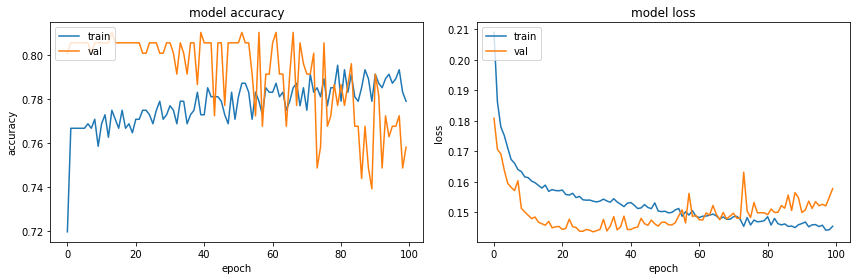

Accuracy: 0.7633333333333333
Precision: 0.7992565055762082
Recall: 0.9267241379310345
F1_score: 0.8582834331337325


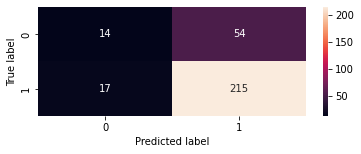

In [17]:
plot_model(history)
print_scores(y_test, predictions)

In [18]:
# A deeper model

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, shuffle=True, validation_split=0.3)
predictions = model.predict(X_test) > 0.5

Epoch 1/100
8/8 [==============================] - 1s 17ms/step - loss: 0.1940 - accuracy: 0.7669 - val_loss: 0.1642 - val_accuracy: 0.8057
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1743 - accuracy: 0.7669 - val_loss: 0.1610 - val_accuracy: 0.8057
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1695 - accuracy: 0.7669 - val_loss: 0.1574 - val_accuracy: 0.8057
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1672 - accuracy: 0.7669 - val_loss: 0.1552 - val_accuracy: 0.8057
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1665 - accuracy: 0.7669 - val_loss: 0.1559 - val_accuracy: 0.8057
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1648 - accuracy: 0.7669 - val_loss: 0.1533 - val_accuracy: 0.8057
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1632 - accuracy: 0.7669 - val_loss: 0.1555 - val_accuracy: 0.8057
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 4ms/step - loss: 0.1426 - accuracy: 0.7894 - val_loss: 0.1573 - val_accuracy: 0.7725
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1445 - accuracy: 0.7914 - val_loss: 0.1537 - val_accuracy: 0.7773
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1436 - accuracy: 0.7812 - val_loss: 0.1529 - val_accuracy: 0.7962
Epoch 62/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1422 - accuracy: 0.7791 - val_loss: 0.1522 - val_accuracy: 0.7867
Epoch 63/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1416 - accuracy: 0.7914 - val_loss: 0.1532 - val_accuracy: 0.7962
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1435 - accuracy: 0.7832 - val_loss: 0.1552 - val_accuracy: 0.7583
Epoch 65/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1430 - accuracy: 0.7955 - val_loss: 0.1524 - val_accuracy: 0.7725
Epoch 66/100
8/8 [===============

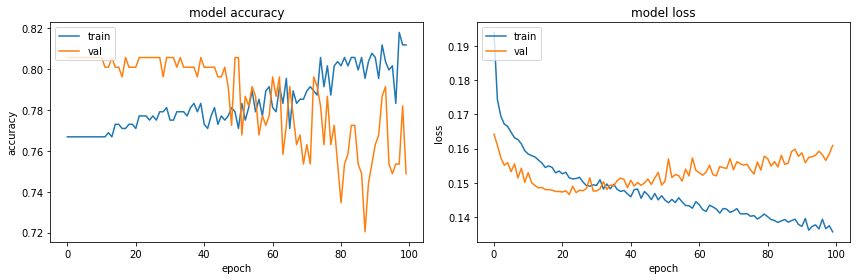

Accuracy: 0.7233333333333334
Precision: 0.792156862745098
Recall: 0.8706896551724138
F1_score: 0.8295687885010267


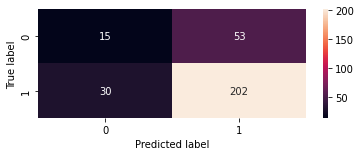

In [19]:
plot_model(history)
print_scores(y_test, predictions)

[Dropout](https://www.example.com)

In [24]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=5))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, shuffle=True, validation_split=0.3) # 
predictions = model.predict(X_test) > 0.5

Epoch 1/100
8/8 [==============================] - 1s 20ms/step - loss: 0.2595 - accuracy: 0.5521 - val_loss: 0.2438 - val_accuracy: 0.8057
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2424 - accuracy: 0.7403 - val_loss: 0.2333 - val_accuracy: 0.8057
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2301 - accuracy: 0.7566 - val_loss: 0.2128 - val_accuracy: 0.8057
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2141 - accuracy: 0.7505 - val_loss: 0.1886 - val_accuracy: 0.8057
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1906 - accuracy: 0.7607 - val_loss: 0.1696 - val_accuracy: 0.8057
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1844 - accuracy: 0.7648 - val_loss: 0.1641 - val_accuracy: 0.8057
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1834 - accuracy: 0.7669 - val_loss: 0.1597 - val_accuracy: 0.8057
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.1539 - accuracy: 0.7812 - val_loss: 0.1443 - val_accuracy: 0.8057
Epoch 60/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1578 - accuracy: 0.7710 - val_loss: 0.1443 - val_accuracy: 0.8057
Epoch 61/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1549 - accuracy: 0.7832 - val_loss: 0.1439 - val_accuracy: 0.7915
Epoch 62/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1542 - accuracy: 0.7771 - val_loss: 0.1514 - val_accuracy: 0.8009
Epoch 63/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1568 - accuracy: 0.7587 - val_loss: 0.1451 - val_accuracy: 0.8057
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1555 - accuracy: 0.7771 - val_loss: 0.1443 - val_accuracy: 0.7915
Epoch 65/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1552 - accuracy: 0.7812 - val_loss: 0.1454 - val_accuracy: 0.7915
Epoch 66/100
8/8 [===============

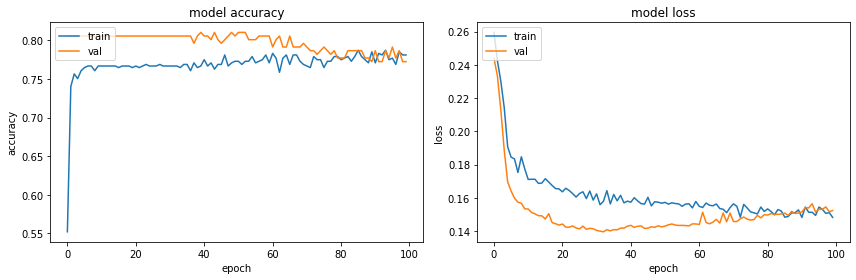

Accuracy: 0.7566666666666667
Precision: 0.7870036101083032
Recall: 0.9396551724137931
F1_score: 0.8565815324165029


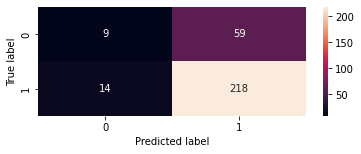

In [25]:
plot_model(history)
print_scores(y_test, predictions)

[Backpropagation](https://www.youtube.com/watch?v=yXcQ4B-YSjQ)
[Stochastic Gradient Descent]()